<div style="background-color: aquamarine; border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
        <img src="./img/h-m-re.png" style="width: 100px;" alt="">
        <p style="text-align: center; font-size: 40px; color:black;"> Exercise - 5</p>
    </div>

<div style="background-color: aquamarine; border-radius: 25px; display: flex; justify-content: center; align-items: center; flex-direction: column;">
        <img src="./img/marketing-ad-icon.jpg" style="width: 80%; margin-top: 15px;" alt="">
        <p style="text-align: center; font-size: 40px; color:black"> The attached data set (csv.AB_marketing) shows an online store that
            Implemented an advertising campaign to increase sales. This campaign is in the group_test column
            It is clear. In fact, each of the users of the online store has a row of the data collection
            They are either in the ads category or in the psa category. People who are placed in ads category have seen advertisements and people who are placed in psa category have seen advertisements.
            have not seen
            In the CONVERTED column, it is specified whether each of the users (rows) made a purchase or not.
            Using interpretive statistics, check if viewing the ad had an impact on users buying from our store or not?</p>
    </div>

 <div style="background-color: aquamarine; border-radius: 25px; display: flex; justify-content: center; align-items: center;  ">
        <img src="./img/lib-re.png" style="width: 100px; margin-top: 15px;" alt="">
        <p style="text-align: center; font-size: 40px; color:black;"> IMPORTING LIBRARY</p>
    </div>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle

<div>
        <img src="./img/data-vs-information.jpg" style="width: 100%; border-radius: 30px;">
</div>

In [2]:
df = pd.read_csv('marketing_AB.csv')


<div style="position: relative;">
        <img src="./img/profit-and-loss-dashboard.png" style="width: 100%; border-radius:50px; " alt="">
        <p style="position: absolute; top: 70px; left: 70px; font-size: 50px; color: black; font-weight: bolder;">DATA OVERVIEW</p>
    </div>

<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; color:black;"> SHAPE :</p>
    </div

In [3]:
rows,col = df.shape
print("rows : ", rows)
print("clos : ", col)

rows :  588101
clos :  7


<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; color: black;"> INFO :</p>
    </div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; color: black;"> HEAD :</p>
    </div>

In [5]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


 <div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; color: black;"> DESCRIBE :</p>
    </div>

In [6]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279667,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


<div>
        <img src="./img/clean.png" style="width: 100%; border-radius: 30px;" alt="">
    </div>

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [9]:
df.isnull().any()

user_id          False
test_group       False
converted        False
total_ads        False
most_ads_day     False
most_ads_hour    False
dtype: bool

In [10]:
df.isnull().sum()

user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

 <div style="">
        <img src="./img/data-infre.png" style="width: 800PX; margin-left: 300PX; border-radius:50px" alt="">
    </div>

In [11]:
df['test_group'].value_counts()

ad     564577
psa     23524
Name: test_group, dtype: int64

In [12]:
df.groupby('test_group')['converted'].value_counts()

test_group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: converted, dtype: int64

In [13]:
df.groupby('test_group')['converted'].value_counts().unstack('converted')

converted,False,True
test_group,,
ad,550154,14423
psa,23104,420


C:\Users\Parisa\AppData\Local\Temp\ipykernel_10780\3564669759.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_converted = df.groupby('test_group').sum()['converted'].plot.pie(figsize=(8,8), autopct='%1.0f%%')


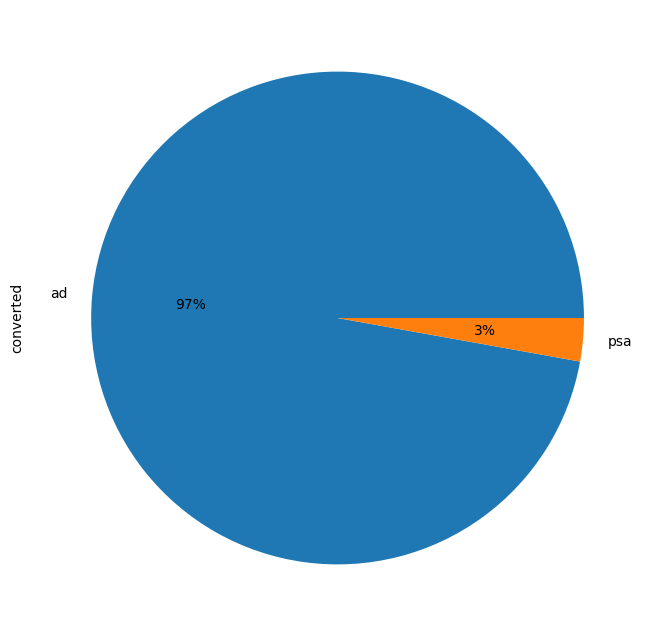

In [14]:
group_converted = df.groupby('test_group').sum()['converted'].plot.pie(figsize=(8,8), autopct='%1.0f%%')
plt.show()

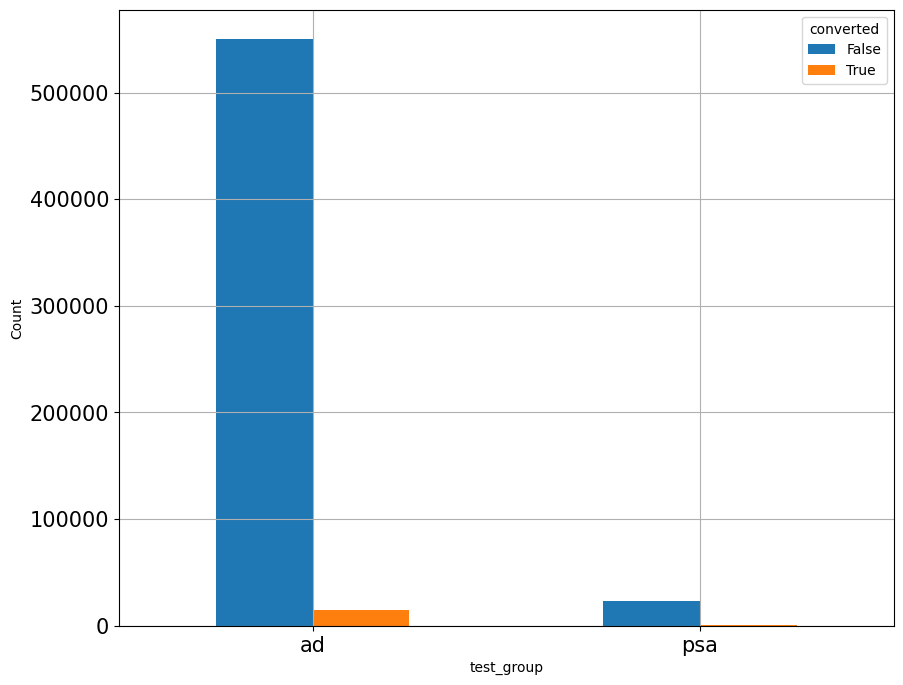

In [15]:
ax = df.groupby(['test_group', 'converted']).count()['user_id'].unstack('converted').plot(
    kind='bar',
    figsize=(10,8),
    grid=True)

ax.tick_params(axis = 'x', labelsize= 15)
plt.xticks(rotation = 'horizontal')
ax.tick_params(axis = 'y', labelsize = 15)
ax.set_ylabel('Count')

plt.show()

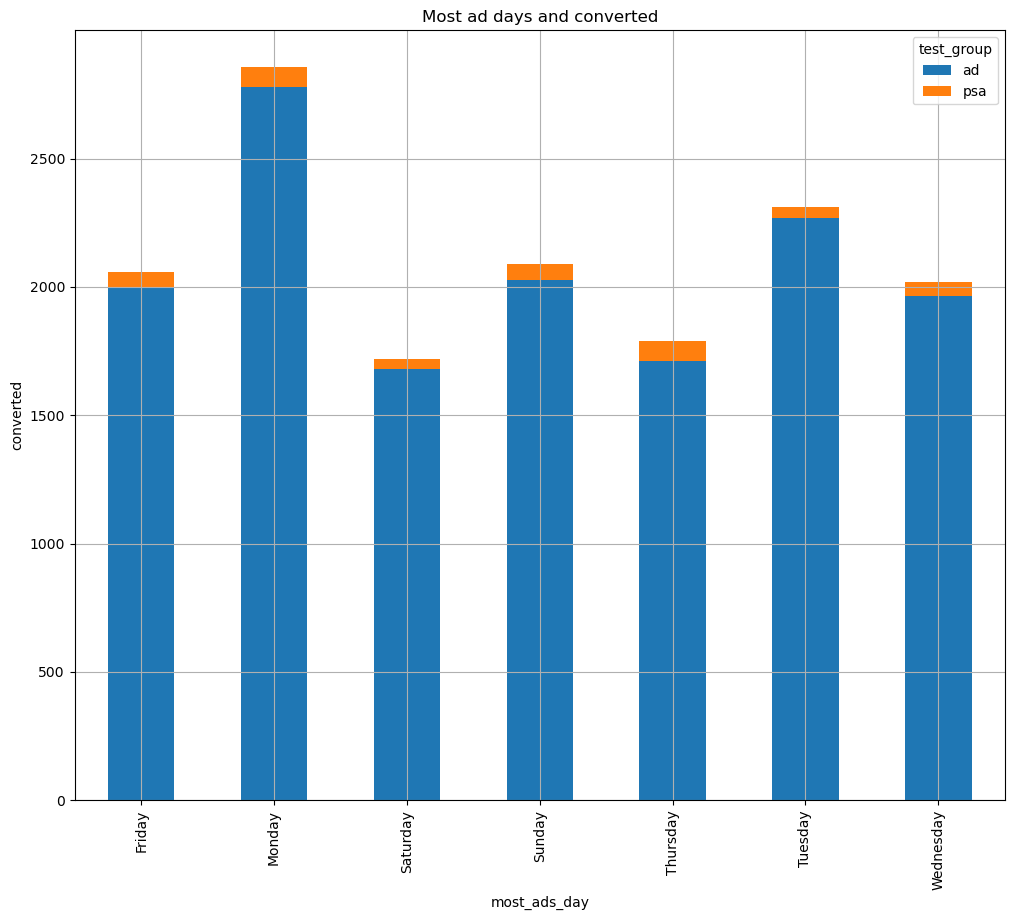

In [16]:
axis =df.groupby(by =['most_ads_day', 'test_group']).sum()['converted']\
.unstack('test_group').plot(kind= 'bar', figsize= (12,10), grid= True, stacked= True)
axis.set_ylabel('converted')
axis.set_title('Most ad days and converted')
plt.show()

C:\Users\Parisa\AppData\Local\Temp\ipykernel_10780\589282945.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axis =df.groupby(by =['most_ads_hour', 'test_group']).sum()['converted']\


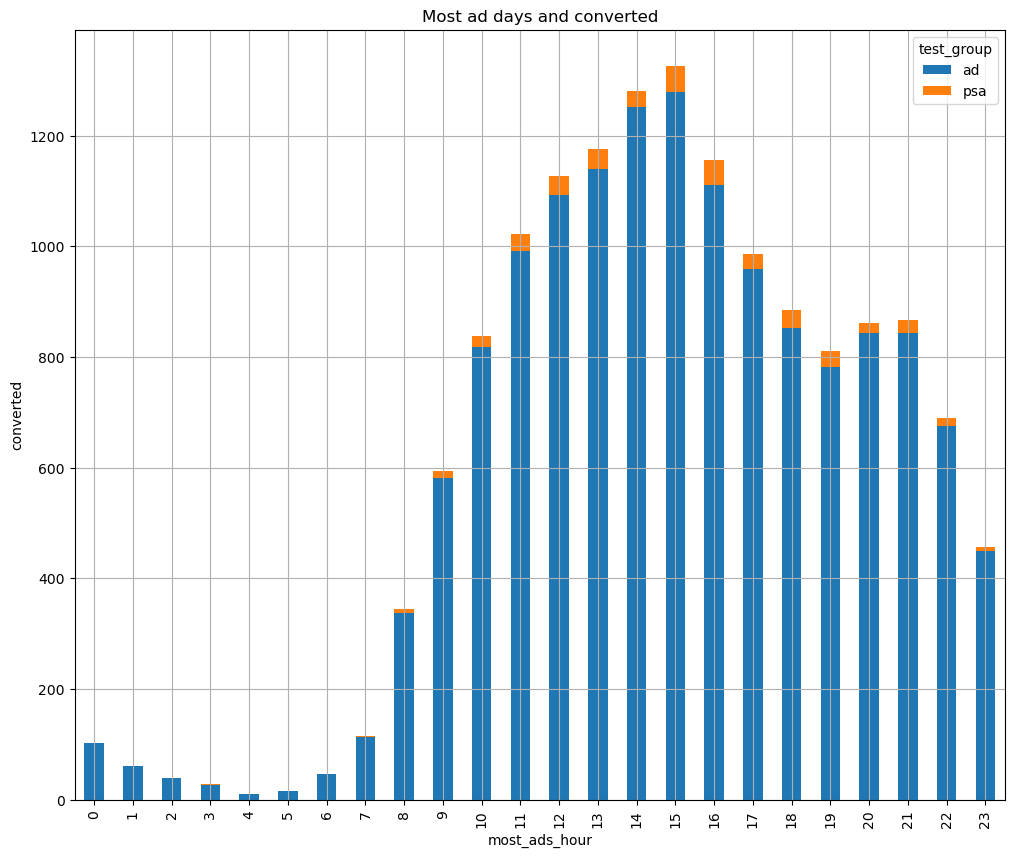

In [17]:
axis =df.groupby(by =['most_ads_hour', 'test_group']).sum()['converted']\
.unstack('test_group').plot(kind= 'bar', figsize= (12,10), grid= True, stacked= True)
axis.set_ylabel('converted')
axis.set_title('Most ad days and converted')
plt.show()

<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; color: black;"> test for be normal :</p>
    </div>

In [18]:
# shapiro test dosent work in this sample !!!! 
# so we use another way ----> bootstrap 

# from scipy.stats import shapiro, levene

# # Data separation based on test group (test_group)
# group_ads = df[df["test_group"] == "ads"]
# group_psa = df[df["test_group"] == "psa"]

# # Shapiro-Wilk test for normal distribution follows
# _, pvalue_ads = shapiro(group_ads["converted"])
# _, pvalue_psa = shapiro(group_psa["converted"])

# print("Shapiro-Wilk Test:")
# print("Ads Group - P-Value:", pvalue_ads)
# print("PSA Group - P-Value:", pvalue_psa)

# # Levene's test for equality of variances
# _, pvalue_variance = levene(group_ads["converted"], group_psa["converted"])

# print("Levene Test:")
# print("P-Value:", pvalue_variance)

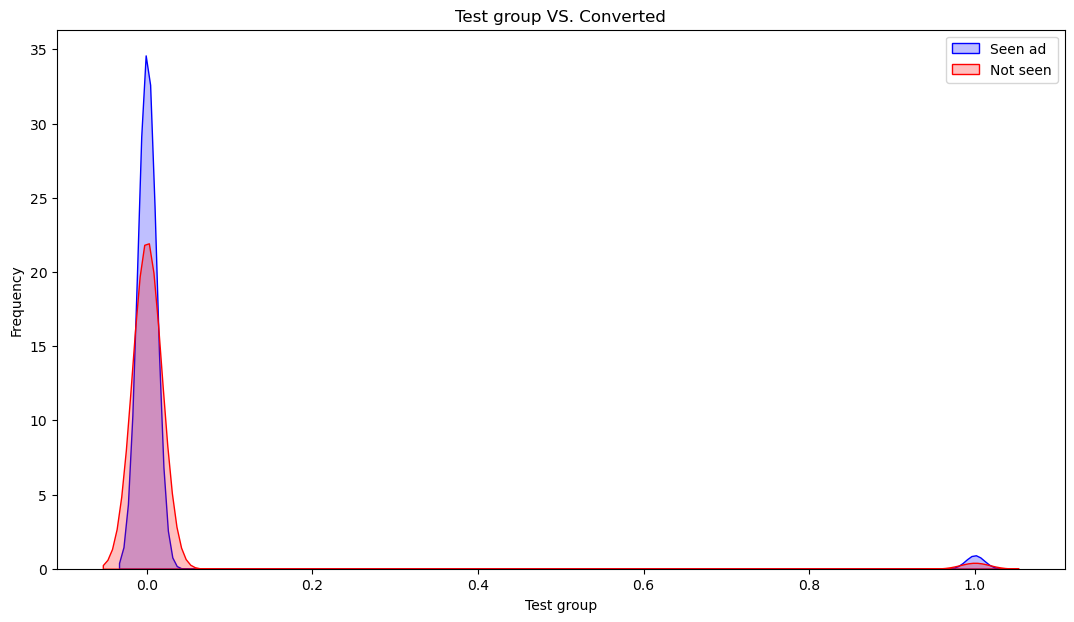

In [19]:
fig = plt.figure(figsize=(13,7))
ax = sns.kdeplot(df.loc[(df['test_group'] == 'ad'), 'converted'], color='b', fill=True, label='Seen ad')
ax = sns.kdeplot(df.loc[(df['test_group'] == 'psa'), 'converted'], color='r', fill=True, label='Not seen')
ax.set(xlabel='Test group', ylabel='Frequency')
plt.title('Test group VS. Converted')
plt.legend();

<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; color: black;"> # Bootstrap analysis</p>
    </div>

In [20]:
#subset the original dataframe
ad_experimental=df[df['test_group']=='ad']
psa_control=df[df['test_group']=='psa']

#find the average converted rate of each group
ad_converted=ad_experimental['converted'].mean()
psa_converted=psa_control['converted'].mean()

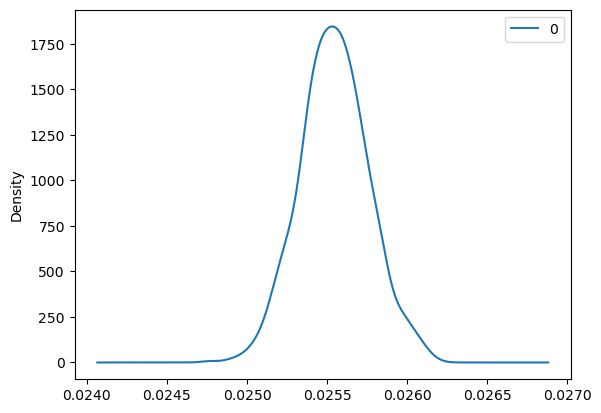

In [21]:
#create an empty list to store bootstrapped means
boot_ad=[]

#Set up a loop that will iterate 1000 times. In each iteration, a new bootstrapped sample will be generated
for i in range (1000):
    boot_mean=ad_experimental.sample(frac=1,replace=True)['converted'].mean()
    boot_ad.append(boot_mean)
    

boot_ad=pd.DataFrame(boot_ad)

#Create a density plot of the bootstrapped means
boot_ad.plot(kind='density');

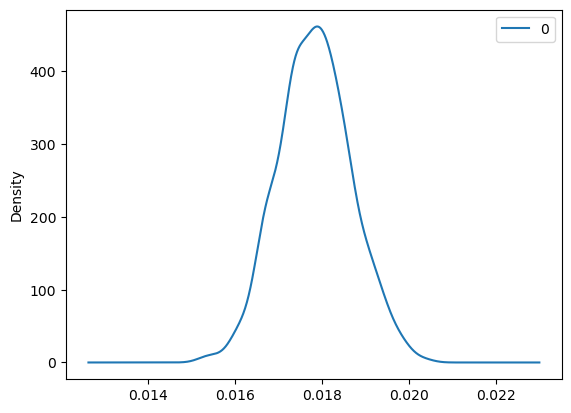

In [22]:
boot_psa=[]

for i in range(1000):
    boot_mean=psa_control.sample(frac=1,replace=True)['converted'].mean()
    boot_psa.append(boot_mean)
    
boot_psa=pd.DataFrame(boot_psa)
boot_psa.plot(kind='density');

<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; color: black;"> code base-test :</p>
    </div>

In [24]:
df['converted'].mean()

0.02523886203220195

In [25]:
ads = df.query('test_group == "ad"')
psa = df.query('test_group == "psa"') 

In [26]:
ads['converted'].mean() * 100

2.5546559636683748

In [28]:
psa['converted'].mean() * 100

1.785410644448223

<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; color: black;"> According to the results of advertising, it has increased sales. Now we have to check whether this increase is statistically significant or not? :</p>
    </div>


In [29]:
ads = df.query('test_group == "ad"') 
psa = df.query('test_group == "psa"')


ads_ab = np.random.binomial(len(ads), df.converted.mean(), 10000) / len(ads)
psa_ab = np.random.binomial(len(psa), df.converted.mean(), 10000) / len(psa)


p_diffs = ads_ab - psa_ab

In [30]:
ab_data_diff = ads['converted'].mean() - psa['converted'].mean()
ab_data_diff

0.007692453192201517

In [31]:
(p_diffs > ab_data_diff).mean() * 100  

0.0

In [32]:
(p_diffs < ab_data_diff).mean() * 100

100.0

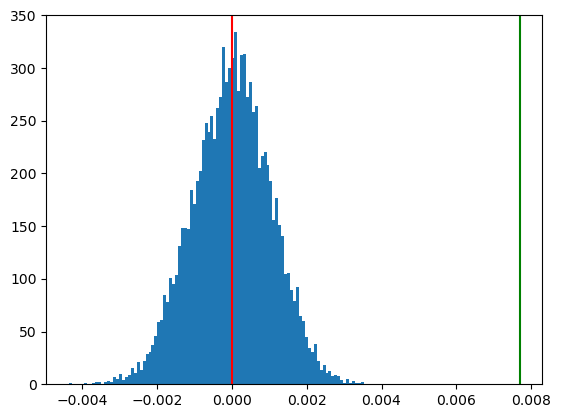

In [33]:
plt.hist(p_diffs, bins=100)
low = ab_data_diff
higth = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=higth, color='r');

In [ ]:
# import numpy as np
# import pandas as pd
# import seaborn as sns



# # Separate data by experimental and control group
# ad_experimental = df[df['test_group'] == 'ad']
# psa_control = df[df['test_group'] == 'psa']

# # Calculate the average conversion rate for each group
# ad_converted = ad_experimental['converted'].mean()
# psa_converted = psa_control['converted'].mean()

# # Calculate the average conversion rate difference
# d = psa_converted - ad_converted

# # Formation of data matrix for AB test

# sales = np.array([
#     np.append(np.zeros(len(ad_experimental)), np.ones(len(psa_control))),
#     np.append(ad_experimental['converted'], psa_control['converted'])
# ])

# # Simulation function
# def sh_exp(N):
#     experiment_diff_mean = np.empty([N, 1])
#     for times in np.arange(N):
#         sales_t = sales.T
#         experiment_label = np.random.randint(0, 2, len(sales_t))
#         experiment_data = np.array([
#             experiment_label,
#             sales_t[:, 1]
#         ]).T
#         experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
#     return experiment_diff_mean

# # Run the simulation function
# e1 = sh_exp(1000)



# # Distribution chart
# sns.displot(e1, bins=50);

<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; color: black;"> t-test :</p>
    </div>

In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def ttest(data1, data2):
  """Performs a t-test on two sets of data."""
  t_statistic, p_value = stats.ttest_ind(data1, data2)
  return t_statistic, p_value

def main():

    # Create two groups of users
    ad_group = df[df["test_group"] == "ad"]
    psa_group = df[df["test_group"] == "psa"]

    # Calculate the mean number of ads seen for each group
    ad_mean = ad_group["converted"].mean()
    psa_mean = psa_group["converted"].mean()

    # Perform a t-test to compare the means of the two groups
    t_statistic, p_value = ttest(ad_group["converted"], psa_group["converted"])

    # Print the results
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)
    if p_value < 0.05:
        print("There is a statistically significant difference in the conversion rates of the two groups.")
    else:
        print("There is no statistically significant difference in the conversion rates of the two groups.")

if __name__ == "__main__":
  main()


T-statistic: 7.37040597428566
P-value: 1.7033052627831264e-13
There is a statistically significant difference in the conversion rates of the two groups.


<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; padding-top:30px; color: black;"> با گرفتن
            اختلاف از عدد تبلیغ دیده شده از عدد تبلیغ دیده نشده متوجه میشویم که تاثیر مثبت بوده .
            و همین طور که میبینیم عدد شانس نزدیک به صفر و خود صفر است .
            پس به این نتیجه میرسیم که احتمال شانسی بودن این افزایش فروش با هر حد آستانه ایی ممکن نیست . و از لحاظ آماری
            معنادار است. ّ</p>
        <br>
        <p style="text-align: center; font-size: 40px; font-weight: bolder; padding-bottom: 30px; color: black;">
            By taking the difference between the number of advertisements seen and the number of advertisements not
            seen, we realize that the effect was positive.
            And as we can see, the chance number is close to zero and zero itself.
            So we come to the conclusion that the chance of this increase in sales is not possible with any threshold.
            And it is statistically significant.
        </p>
    </div>

In [29]:
#Peyman Radmanesh

#peyman